## Analysing frequency sweep where scale and permittivity are parameterised 

- Test reading to google drive
- convert all outputs to CSV files
- plot a couple to check sanity
- plot correlations as function of frequency

In [1]:
from WIPL_python_analysis.SinglePolPlots import SinglePolPlots
from WIPL_python_analysis.DualPol import DualPol
from WIPL_python_analysis.DictToSinglePolResults import OutputDictToSinglePolResultsConverter as converter
import sys
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append('./')

In [ ]:
# Data as a dictionary
dielectrics = pd.DataFrame({
    'F Ghz': [2, 2.7, 3.7, 4.9, 6.7, 9.0, 12, 16, 22, 30],
    'Re Mirk': [47, 46, 44, 41, 40, 35, 30, 25, 20, 15],
    'Im Mirk': [20, 19, 19, 19, 19, 19, 19, 19, 19, 19],
    'Re Chit': [5.3, 5.2, 5.2, 5.1, 5.1, 5.0, 5.0, 4.9, 4.9, 4.8],
    'Im Chit': [0.11, 0.12, 0.12, 0.12, 0.12, 0.12, 0.13, 0.13, 0.13, 0.13]
})

# Calculate the new columns
dielectrics['Mirk Magnitude'] = np.sqrt(dielectrics['Re Mirk']**2 + dielectrics['Im Mirk']**2)
dielectrics['Chit Magnitude'] = np.sqrt(dielectrics['Re Chit']**2 + dielectrics['Im Chit']**2)
dielectrics['Wing Importance'] = dielectrics['Re Chit'] / dielectrics['Re Mirk']

# Display the DataFrame
print(dielectrics)

   F Ghz  Re Mirk  Im Mirk  Re Chit  Im Chit  Mirk Magnitude  Chit Magnitude  \
0    2.0       47       20      5.3     0.11       51.078371        5.301141   
1    2.7       46       19      5.2     0.12       49.769469        5.201384   
2    3.7       44       19      5.2     0.12       47.927028        5.201384   
3    4.9       41       19      5.1     0.12       45.188494        5.101412   
4    6.7       40       19      5.1     0.12       44.283180        5.101412   
5    9.0       35       19      5.0     0.12       39.824616        5.001440   
6   12.0       30       19      5.0     0.13       35.510562        5.001690   
7   16.0       25       19      4.9     0.13       31.400637        4.901724   
8   22.0       20       19      4.9     0.13       27.586228        4.901724   
9   30.0       15       19      4.8     0.13       24.207437        4.801760   

   Wing Importance  
0         0.112766  
1         0.113043  
2         0.118182  
3         0.124390  
4         0.12

In [3]:
BASE_DRIVE_PATH = '/Users/sstk4353/Library/CloudStorage/GoogleDrive-thomas.matthews@ncas.ac.uk/My Drive/WIPL/Bernard_ellipsoid_comparison/'
BERNARD_PATH = 'Bernard/'
ELLIPSOID_PATH = 'Ellipsoid/'

In [4]:
frequency_name_list = ['020', '027', '037', '049', '067', '090', '120', '160', '220', '300']
frequencies = [2,2.7,3.7,4.9,6.7,9,12,16,22,30]

In [5]:
if False:
    frequencies = []
    wavelengths = []
    for freq in range(20):
        path = BASE_DRIVE_PATH + 'Ellipsoid/0375_unshifted/' + f'H_DICT_PKL/' + f'Ellipsoid_0375_sweep_H_1_60_20_f{freq}_dict.pkl'
        conv = converter.from_pickle(path)
        frequencies.append(conv.frequency)
        wavelengths.append(conv.wavelength)

### Converting outputs to csv files

#### Ellipsoid

In [6]:
if False:
    for scale in ['0206', '0553', '1000', '1588']:
        for polarisation in ['H']:#['H', 'V']:
            for freq in frequency_name_list:
                path = BASE_DRIVE_PATH + f'Ellipsoid/{scale}/' + f'{polarisation}_DICT_PKL_low_res_comp/' + f'Ellipsoid_{scale}_sweep_{polarisation}_{freq}_dict.pkl'
                conv = converter.from_pickle(path)
                df = conv.generate_output_df()
                
                output_path = BASE_DRIVE_PATH + f'Ellipsoid/{scale}/' + f'{polarisation}_CSV/' + f'Ellipsoid_{scale}_sweep_{polarisation}_{freq}_df.csv'

                df.to_csv(output_path)

#### Bernard

In [7]:
if False:
    for scale in ['0206', '0553', '1000', '1588']:
        for polarisation in ['H']:#['H', 'V']:
            for freq in frequency_name_list:
                #print(f'Processing Bernard {scale} {polarisation} {freq}')
                path = BASE_DRIVE_PATH + f'Bernard/{scale}/' + f'{polarisation}_DICT_PKL_low_res/' + f'Bernard_{scale}_sweep_{polarisation}_{freq}_dict.pkl'
                conv = converter.from_pickle(path)
                df = conv.generate_output_df()
                
                output_path = BASE_DRIVE_PATH + f'Bernard/{scale}/' + f'{polarisation}_CSV/' + f'Bernard_{scale}_sweep_{polarisation}_{freq}_df.csv'

                df.to_csv(output_path)

### Single pol RCS

In [8]:
# single_pol_obj_dict = {
#     'Bernard' :
#     {
#         '1000' :
#         {
#             'H' : [],
#             'V' : []
#         }
#     },
#     'Ellipsoid' :
#     {
#         '1000' :
#         {
#             'H' : [],
#             'V' : []
#         }
#     }
# }

In [9]:
single_pol_obj_dict = {
    'Bernard' :{
         '0206': {
            'H' : [],
            'V' : [],
        },
        '0553' : {
            'H' : [],
            'V' : [],
        },
         '1000': {
            'H' : [],
            'V' : [],
        },
         '1588': {
            'H' : [],
            'V' : [],
        },
    },
    'Ellipsoid' : {
         '0206': {
            'H' : [],
            'V' : [],
        },
        '0553' : {
            'H' : [],
            'V' : [],
        },
         '1000': {
            'H' : [],
            'V' : [],
        },
         '1588': {
            'H' : [],
            'V' : [],
        },
    },
}

In [10]:
for scale in ['0206', '0553', '1000', '1588']:
    for model, model_path in zip(['Bernard', 'Ellipsoid'], [BERNARD_PATH, ELLIPSOID_PATH]):
        for pol in ['H']:#, 'V']:
            for freq in frequency_name_list:
                path = BASE_DRIVE_PATH + model_path + f'{scale}/{pol}_CSV/' + f'{model}_{scale}_sweep_{pol}_{freq}_df.csv'
                single_pol_obj_dict[model][scale][pol].append(pd.read_csv(path))

In [11]:
for scale in ['1000']:
    for model, model_path in zip(['Bernard', 'Ellipsoid'], [BERNARD_PATH, ELLIPSOID_PATH]):
        for pol in ['V']:
            for freq in frequency_name_list:
                path = BASE_DRIVE_PATH + model_path + f'{scale}/{pol}_CSV/' + f'{model}_{scale}_sweep_{pol}_{freq}_df.csv'
                single_pol_obj_dict[model][scale][pol].append(pd.read_csv(path))

In [12]:
def plot_corrected_rcs(df, title=None):
    phi = df['phi']
    corrected_rcs = df['Corrected_RCS']
    
    plt.figure(figsize=(8, 6))
    plt.plot(phi, corrected_rcs, label='Corrected RCS')
    plt.xlabel('Azimuth (degrees)')
    plt.ylabel('Corrected RCS (cm^2)')

    if title:
        plt.title(title)

    plt.legend()
    plt.show()

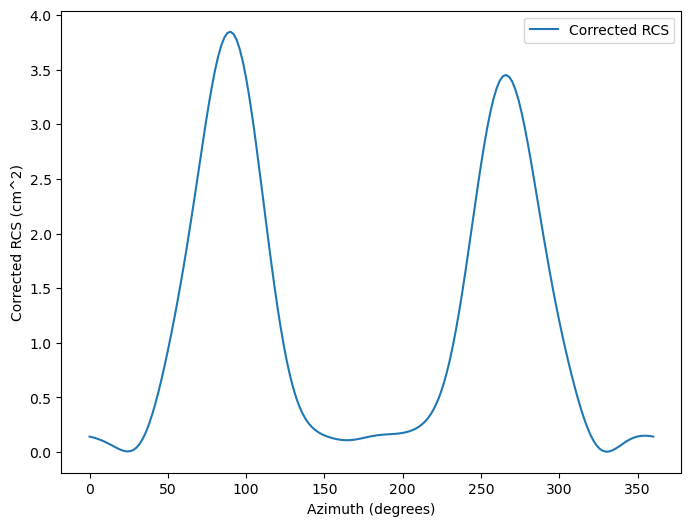

In [13]:
plot_corrected_rcs(single_pol_obj_dict['Bernard']['1000']['H'][5])

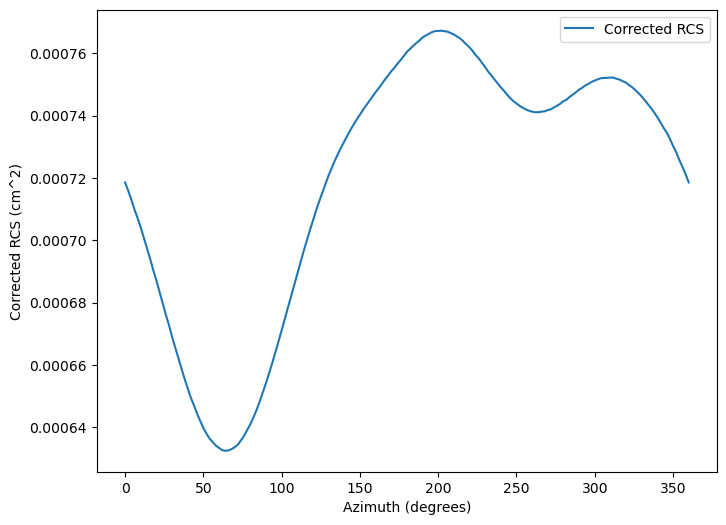

In [14]:
plot_corrected_rcs(single_pol_obj_dict['Bernard']['1000']['V'][0])

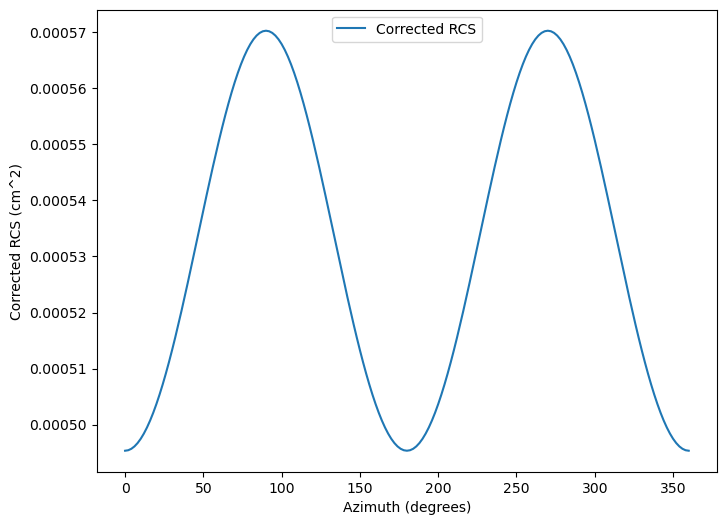

In [15]:
plot_corrected_rcs(single_pol_obj_dict['Ellipsoid']['1000']['V'][0])

In [16]:
H_corrs = {
    '0206' : [],
    '0553' : [],
    '1000' : [],
    '1588' : [],
}
H_means = {
    '0206' : [],
    '0553' : [],
    '1000' : [],
    '1588' : [],
}

In [17]:
for scale in ['0206', '0553', '1000', '1588']:
    for freq in range(10):
        H_corrs[scale].append(single_pol_obj_dict['Bernard'][scale]['H'][freq]['Corrected_RCS'].corr(single_pol_obj_dict['Ellipsoid'][scale]['H'][freq]['Corrected_RCS']))
        H_means[scale].append(single_pol_obj_dict['Bernard'][scale]['H'][freq]['Corrected_RCS'].mean()/single_pol_obj_dict['Ellipsoid'][scale]['H'][freq]['Corrected_RCS'].mean())

In [18]:
def wavelength(frequencies):
    return 3e10 / (np.array(frequencies) * 1e9)

In [19]:
wavelength(frequencies)

array([15.        , 11.11111111,  8.10810811,  6.12244898,  4.47761194,
        3.33333333,  2.5       ,  1.875     ,  1.36363636,  1.        ])

/tmp/ipykernel_40018/3816984766.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


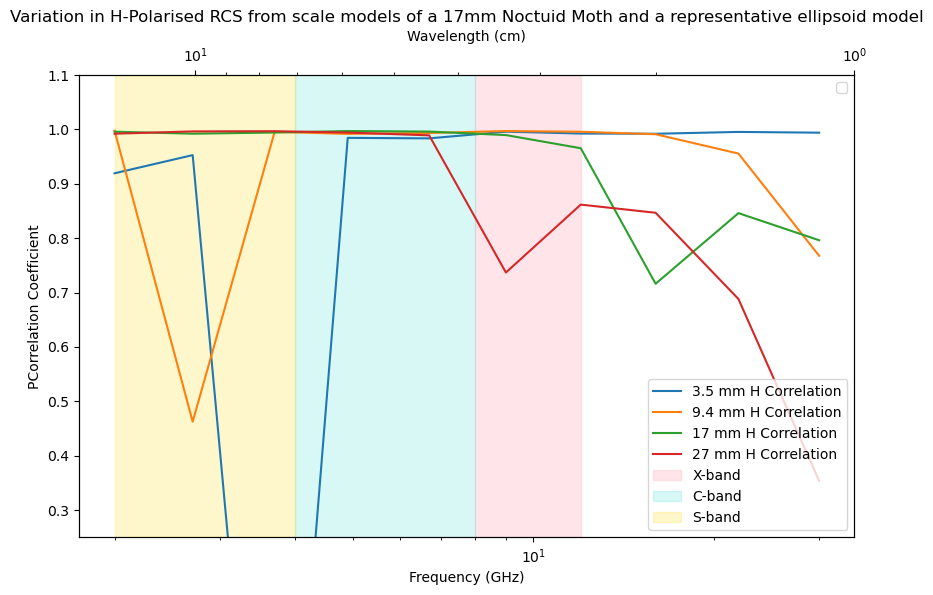

In [20]:
wavelengths = wavelength(frequencies)

wavelength_body_ratio = wavelengths/1.7
body_wavelength_ratio = 1.7/np.array(wavelengths)

plt.figure(figsize=(10, 6))
plt.xscale('log')
for scale, length in zip(['0206', '0553', '1000', '1588'], [3.5, 9.4, 17, 27]):
    plt.plot(frequencies, H_corrs[scale], label=f'{length} mm H Correlation')

plt.title('Variation in H-Polarised RCS from scale models of a 17mm Noctuid Moth and a representative ellipsoid model')
plt.ylabel('PCorrelation Coefficient')
plt.xlabel('Frequency (GHz)')
plt.ylim(0.25,1.1)
# plt.axvline(x=3.2/0.64, color='r', linestyle='--', label='X-band')
# plt.axvline(x=5/0.64, color='g', linestyle='--', label='C-band')
# plt.axvline(x=10/0.64, color='pink', linestyle='--', label='S-band')

# plt.axvline(x=1.7/10, color='pink', linestyle='--', label='S-band')
# plt.axvline(x=1.7/5, color='g', linestyle='--', label='C-band')
# plt.axvline(x=1.7/3.2, color='r', linestyle='--', label='X-band')

plt.axvspan(8, 12, color='pink', alpha=0.4, label='X-band')
plt.axvspan(4, 8, color='turquoise', alpha=0.2, label='C-band')
plt.axvspan(2, 4, color='gold', alpha=0.2, label='S-band')
plt.legend()

# Create the second x-axis (wavelength)
ax2 = plt.twiny()  # Create a second axes sharing the y-axis

# Set the x-axis limits for wavelength, corresponding to the frequency limits
ax2.set_xscale('log') # Important: Set the scale to logarithmic
ax2.set_xlim(wavelengths[0], wavelengths[9]) # calculate wavelength limits and reverse them!
ax2.set_xlabel('Wavelength (cm)')

plt.legend()


plt.show()


/tmp/ipykernel_40018/3765012140.py:37: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  info['axis'].set_xlim(0,2.5)


Text(0.5, 0.98, 'Correlation of horizontal power scattered between a Noctuid Moth and a representative ellipsoid')

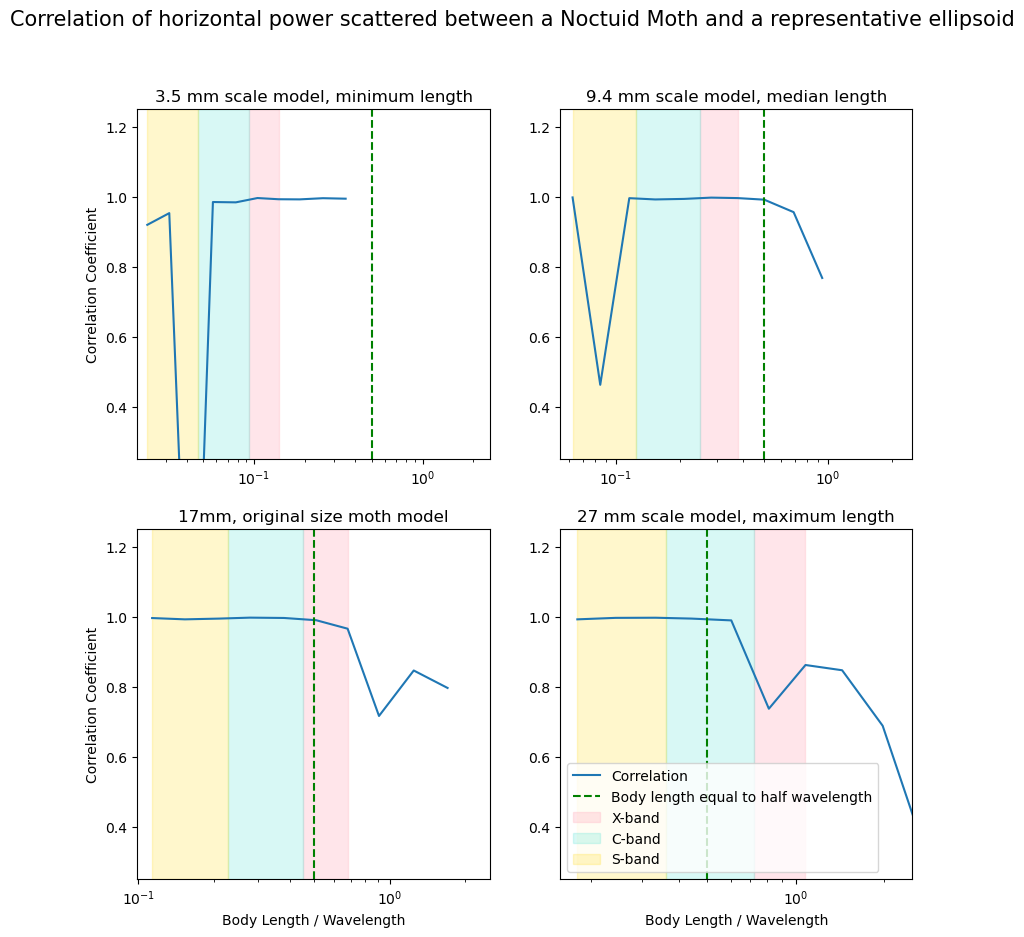

In [23]:
wavelengths = wavelength(frequencies)

f, axs = plt.subplots(2,2, sharey=False, figsize = (10,10))

info = {
    '0206' : {
        'length_str' : '3.5 mm',
        'length_cm' : 0.35,
        'axis' : axs[0,0],
        'stat' : 'minimum',
    },
    '0553' : {
        'length_str' : '9.4 mm',
        'length_cm' : 0.94,
        'axis' : axs[0,1],
        'stat' : 'median',
    },
    '1000' : {
        'length_str' : '17 mm',
        'length_cm' : 1.7,
        'axis' : axs[1,0],
        'stat' : False,
    },
    '1588' : {
        'length_str' : '27 mm',
        'length_cm' : 2.7,
        'axis' : axs[1,1],
        'stat' : 'maximum',
    },
}

for scale, info in info.items():
    body_wavelength_ratio = info['length_cm']/np.array(wavelengths)
    info['axis'].plot(body_wavelength_ratio, H_corrs[scale], linestyle = '-', label = 'Correlation')
    #info['axis'].plot(body_wavelength_ratio, H_means[scale], linestyle = '--', label='Ratio of means')
    info['axis'].set_xscale('log')
    info['axis'].set_xlim(0,2.5)
    info['axis'].axvline(x=0.5, color = 'green', linestyle = '--', label = 'Body length equal to half wavelength')
    info['axis'].axvspan(info['length_cm']/wavelength(8), info['length_cm']/wavelength(12), color='pink', alpha=0.4, label='X-band')
    info['axis'].axvspan(info['length_cm']/wavelength(4), info['length_cm']/wavelength(8), color='turquoise', alpha=0.2, label='C-band')
    info['axis'].axvspan(info['length_cm']/wavelength(2), info['length_cm']/wavelength(4), color='gold', alpha=0.2, label='S-band')
    info['axis'].set_ylim(0.25,1.25)
    if info['stat']:
        info['axis'].set_title(info['length_str'] + f' scale model, {info['stat']} length')
    else:
        info['axis'].set_title('17mm, original size moth model')


axs[1,1].legend()
axs[1,0].set_xlabel('Body Length / Wavelength')
axs[1,1].set_xlabel('Body Length / Wavelength')
axs[1,0].set_ylabel('Correlation Coefficient')
axs[0,0].set_ylabel('Correlation Coefficient')
f.suptitle('Correlation of horizontal power scattered between a Noctuid Moth and a representative ellipsoid', size = 15)
    

/tmp/ipykernel_26877/3370735224.py:37: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  info['axis'].set_xlim(0,2.5)


Text(0.5, 0.98, 'Ratio of means between scale models of Noctuid Moth and representative ellipsoids')

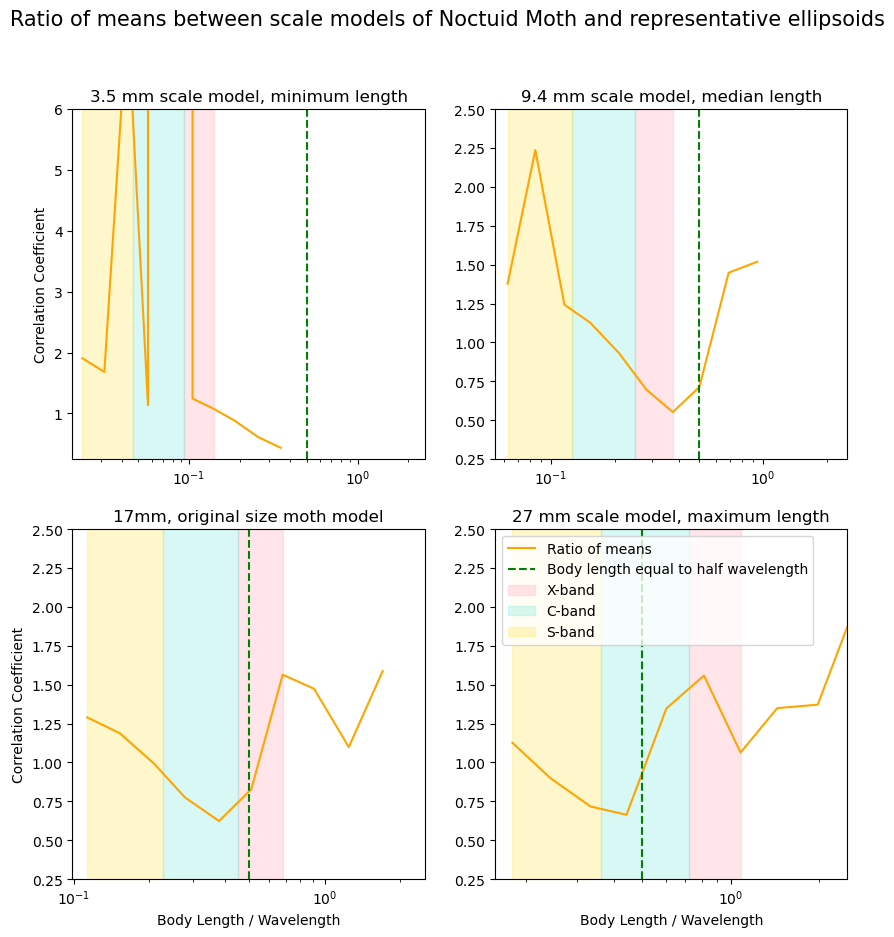

In [ ]:
wavelengths = wavelength(frequencies)

f, axs = plt.subplots(2,2, sharey=False, figsize = (10,10))

info_dict = {
    '0206' : {
        'length_str' : '3.5 mm',
        'length_cm' : 0.35,
        'axis' : axs[0,0],
        'stat' : 'minimum',
    },
    '0553' : {
        'length_str' : '9.4 mm',
        'length_cm' : 0.94,
        'axis' : axs[0,1],
        'stat' : 'median',
    },
    '1000' : {
        'length_str' : '17 mm',
        'length_cm' : 1.7,
        'axis' : axs[1,0],
        'stat' : False,
    },
    '1588' : {
        'length_str' : '27 mm',
        'length_cm' : 2.7,
        'axis' : axs[1,1],
        'stat' : 'maximum',
    },
}

for scale, info in info_dict.items():
    body_wavelength_ratio = info['length_cm']/np.array(wavelengths)
    #info['axis'].plot(body_wavelength_ratio, H_corrs[scale], linestyle = '-', label = 'Correlation')
    info['axis'].plot(body_wavelength_ratio, H_means[scale], linestyle = '-', color = 'orange', label='Ratio of means')
    info['axis'].set_xscale('log')
    info['axis'].set_xlim(0,2.5)
    info['axis'].axvline(x=0.5, color = 'green', linestyle = '--', label = 'Body length equal to half wavelength')
    info['axis'].axvspan(info['length_cm']/wavelength(8), info['length_cm']/wavelength(12), color='pink', alpha=0.4, label='X-band')
    info['axis'].axvspan(info['length_cm']/wavelength(4), info['length_cm']/wavelength(8), color='turquoise', alpha=0.2, label='C-band')
    info['axis'].axvspan(info['length_cm']/wavelength(2), info['length_cm']/wavelength(4), color='gold', alpha=0.2, label='S-band')
    info['axis'].set_ylim(0.25,2.5)
    if info['stat']:
        info['axis'].set_title(info['length_str'] + f' scale model, {info['stat']} length')
    else:
        info['axis'].set_title('17mm, original size moth model')

axs[0,0].set_ylim(0.25,6)
axs[1,1].legend()
axs[1,0].set_xlabel('Body Length / Wavelength')
axs[1,1].set_xlabel('Body Length / Wavelength')
axs[1,0].set_ylabel('Correlation Coefficient')
axs[0,0].set_ylabel('Correlation Coefficient')
f.suptitle('Ratio of means between scale models of Noctuid Moth and representative ellipsoids', size = 15)

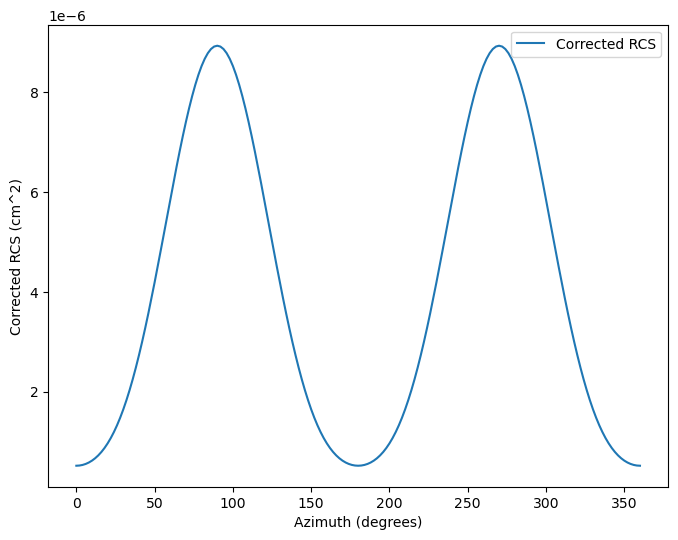

In [ ]:
plot_corrected_rcs(single_pol_obj_dict['Ellipsoid']['0206']['H'][2])

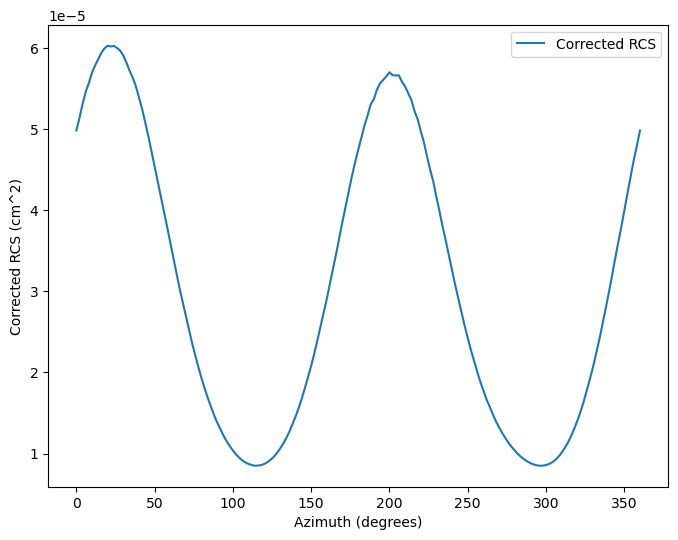

In [25]:
plot_corrected_rcs(single_pol_obj_dict['Bernard']['0206']['H'][2])

In [ ]:
H_corrs = []
V_corrs = []
H_mean_ratio = []
V_mean_ratio = []

for freq in range(len(frequency_name_list)):
    H_corrs.append(single_pol_obj_dict['Bernard']['1000']['H'][freq]['Corrected_RCS'].corr(single_pol_obj_dict['Ellipsoid']['1000']['H'][freq]['Corrected_RCS']))
    V_corrs.append(single_pol_obj_dict['Bernard']['1000']['V'][freq]['Corrected_RCS'].corr(single_pol_obj_dict['Ellipsoid']['1000']['V'][freq]['Corrected_RCS']))
    H_mean_ratio.append(single_pol_obj_dict['Bernard']['1000']['H'][freq]['Corrected_RCS'].mean() / single_pol_obj_dict['Ellipsoid']['1000']['H'][freq]['Corrected_RCS'].mean())
    V_mean_ratio.append(single_pol_obj_dict['Bernard']['1000']['V'][freq]['Corrected_RCS'].mean() / single_pol_obj_dict['Ellipsoid']['1000']['V'][freq]['Corrected_RCS'].mean())

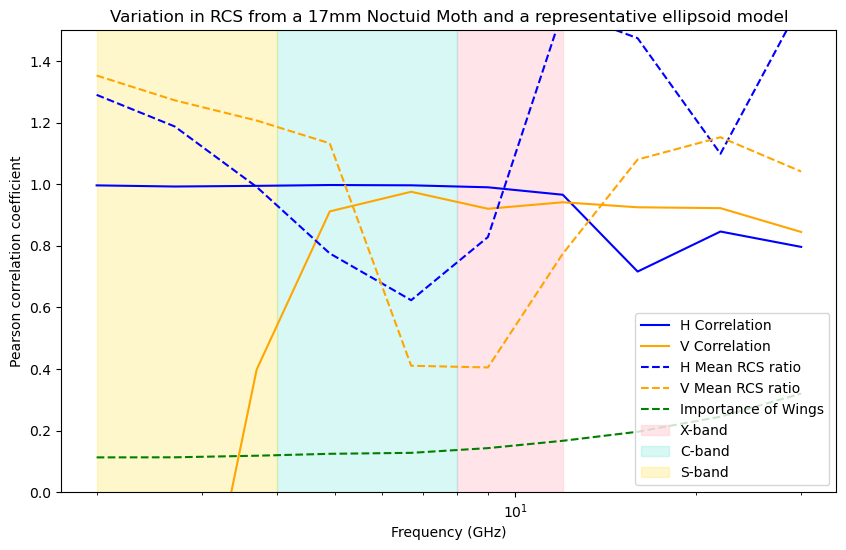

In [ ]:
wavelengths = wavelength(frequencies)

wavelength_body_ratio = wavelengths/1.7
body_wavelength_ratio = 1.7/np.array(wavelengths)

plt.figure(figsize=(10, 6))
plt.xscale('log')
plt.plot(frequencies, H_corrs, label='H Correlation', color = 'b', linestyle = '-')
plt.plot(frequencies, V_corrs, label='V Correlation', color = 'orange', linestyle = '-')
plt.plot(frequencies, H_mean_ratio, label = 'H Mean RCS ratio', color = 'b', linestyle = '--')
plt.plot(frequencies, V_mean_ratio, label = 'V Mean RCS ratio', color = 'orange', linestyle = '--')
plt.plot(frequencies, dielectrics['Wing Importance'], label = 'Importance of Wings', color = 'g', linestyle = '--')
plt.title('Variation in RCS from a 17mm Noctuid Moth and a representative ellipsoid model')
plt.ylabel('Pearson correlation coefficient')
plt.xlabel('Frequency (GHz)')
plt.ylim(0,1.5)
# plt.axvline(x=3.2/0.64, color='r', linestyle='--', label='X-band')
# plt.axvline(x=5/0.64, color='g', linestyle='--', label='C-band')
# plt.axvline(x=10/0.64, color='pink', linestyle='--', label='S-band')

plt.axvspan(8, 12, color='pink', alpha=0.4, label='X-band')
plt.axvspan(4, 8, color='turquoise', alpha=0.2, label='C-band')
plt.axvspan(2, 4, color='gold', alpha=0.2, label='S-band')



plt.legend()

At short wavelengths, the Vertical Polarisation is mostly almost anti correlated. Could it be the case that as Rayleigh scatterers, internal effects are less important, and the wings actually make more of a contribution? That would make sense looking at the mean ratio?

(-1.0, 2.0)

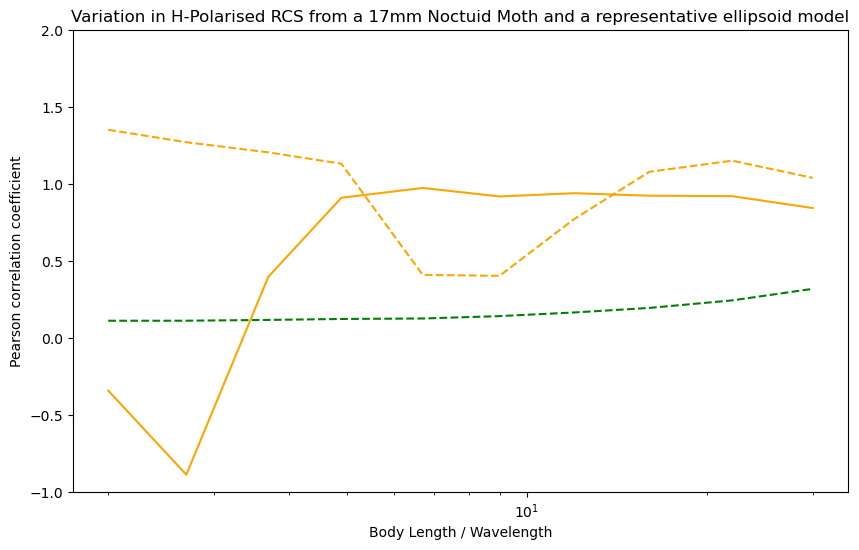

In [ ]:
wavelengths = wavelength(frequencies)

body_wavelength_ratio = (0.3*1.7)/np.array(wavelengths)

plt.figure(figsize=(10, 6))
plt.xscale('log')
plt.plot(frequencies, V_corrs, label='V Correlation', color = 'orange', linestyle = '-')
plt.plot(frequencies, V_mean_ratio, label = 'V Mean RCS ratio', color = 'orange', linestyle = '--')
plt.plot(frequencies, dielectrics['Wing Importance'], label = 'Importance of Wings', color = 'g', linestyle = '--')
plt.title('Variation in H-Polarised RCS from a 17mm Noctuid Moth and a representative ellipsoid model')
plt.ylabel('Pearson correlation coefficient')
plt.xlabel('Body Length / Wavelength')
plt.ylim(-1,2)
# plt.axvline(x=3.2/0.64, color='r', linestyle='--', label='X-band')
# plt.axvline(x=5/0.64, color='g', linestyle='--', label='C-band')
# plt.axvline(x=10/0.64, color='pink', linestyle='--', label='S-band')

# plt.axvline(x=0.3*1.7/10, color='pink', linestyle='--', label='S-band')
# plt.axvline(x=0.3*1.7/5, color='g', linestyle='--', label='C-band')
# plt.axvline(x=0.3*1.7/3.2, color='r', linestyle='--', label='X-band')

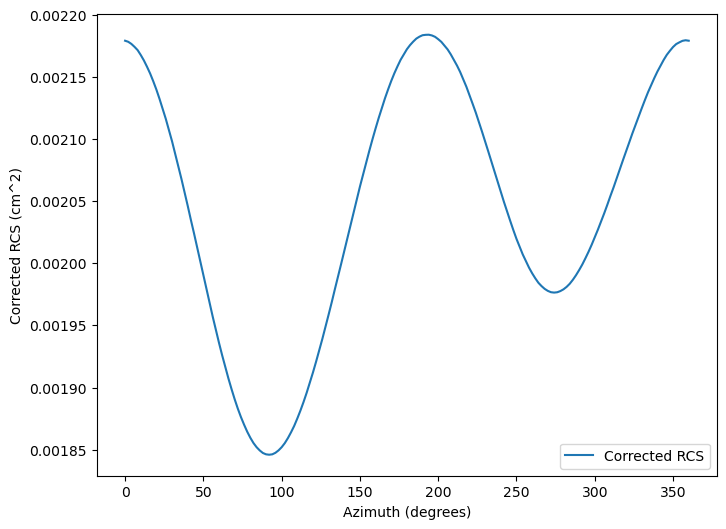

In [ ]:
plot_corrected_rcs(single_pol_obj_dict['Bernard']['1000']['V'][1])

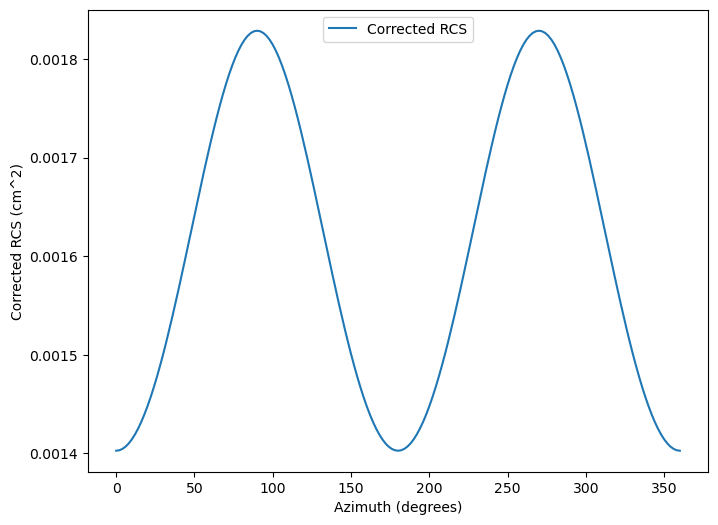

In [ ]:
plot_corrected_rcs(single_pol_obj_dict['Ellipsoid']['1000']['V'][1])

In [ ]:
import joblib

In [ ]:
B1000_V_027_high_res = joblib.load('temp.pkl')

In [ ]:
B1000_V_027_high_res['Corrected_RCS'].corr(single_pol_obj_dict['Ellipsoid']['1000']['V'][1]['Corrected_RCS'])

np.float64(0.5191707241885316)

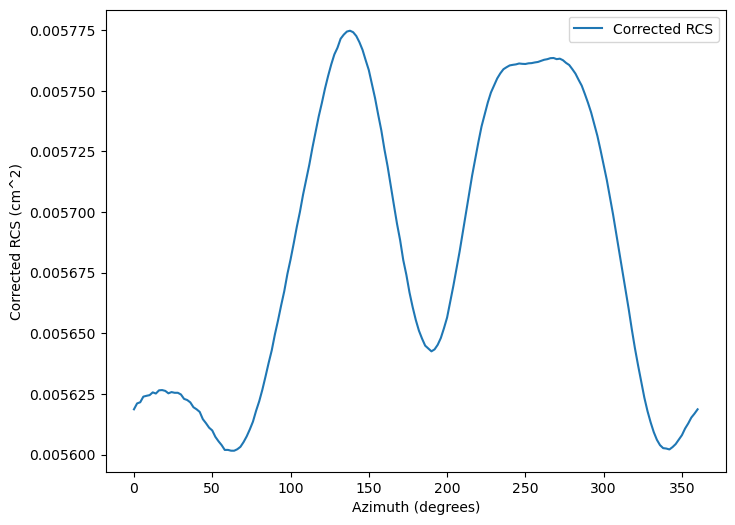

In [ ]:
plot_corrected_rcs(single_pol_obj_dict['Bernard']['1000']['V'][2])